In [3]:
from source.python.sorting import insertion_sort, recursive_insertion_sort, selection_sort, merge_sort, merge_sort_ins_2, merge_sort_ins_4, merge_sort_ins_8
from source.python.sorting_c.sorting_algs import insertion_sort_c, recursive_insertion_sort_c, selection_sort_c, merge_sort_c
import time
from typing import Callable
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Recursive insertion sort written in python quite quickly exceeds the maximum recursion depth, therefore it will be excluded from further considerations
!pytest source/tests/sort_testing.py

============================= test session starts ==============================
platform linux -- Python 3.11.4, pytest-7.4.3, pluggy-1.3.0
rootdir: /home/rbuntu/Grath/CLRS/Chapter2
collected 9 items                                                              

source/tests/sort_testing.py .........                                   [100%]

============================== 9 passed in 0.02s ===============================


In [5]:
def measure_times(functions: list[Callable[[list[int]], list[int]]], sizes: list[int], samples: int = 1):
    random.seed(42) # Add random seed for reproducibility
    assert samples > 0, "Sample size must be and integer greater than zero"

    function_dictionary = dict([(function, []) for function in functions])

    for size in sizes:
        arrs = [[random.randint(0, 1000) for _ in range(size)] for _ in range(samples)]
        for function in functions:
            start = time.time()
            for arr in arrs:
                _ = functions[function](arr)
            total_time = time.time() - start
            function_dictionary[function].append(total_time / samples)
    
    return function_dictionary



In [6]:
functions = {'insertion_sort': insertion_sort, 'insertion_sort_c': insertion_sort_c, 'recursive_insertion_sort_c': recursive_insertion_sort_c, 'selection_sort': selection_sort, 'selection_sort_c': selection_sort_c, 'merge_sort': merge_sort, 'merge_sort_c': merge_sort_c}

In [7]:
functions = {'insertion_sort_c': insertion_sort_c, 'recursive_insertion_sort_c': recursive_insertion_sort_c, 'selection_sort_c': selection_sort_c, 'merge_sort': merge_sort, 'merge_sort_c': merge_sort_c}

In [8]:
functions = {'insertion_sort_c': insertion_sort_c, 'recursive_insertion_sort_c': recursive_insertion_sort_c, 'selection_sort_c': selection_sort_c, 'merge_sort_c': merge_sort_c}

In [9]:
functions = {'merge_sort_py': merge_sort, 'merge_sort_ins_2_py': merge_sort_ins_2, 'merge_sort_ins_4_py': merge_sort_ins_4, 'merge_sort_ins_8_py': merge_sort_ins_8}

In [17]:
def visualization(sizes, functions, samples=5):
    f_times = measure_times(functions=functions, sizes=sizes, samples=samples)
    df = pd.DataFrame(f_times, sizes).rename_axis(index='N')

    sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize': (10, 6)})
    ax = sns.lineplot(data=df)
    ax.set(ylabel='Time')
    # plt.yscale('log')
    plt.plot()

    return df

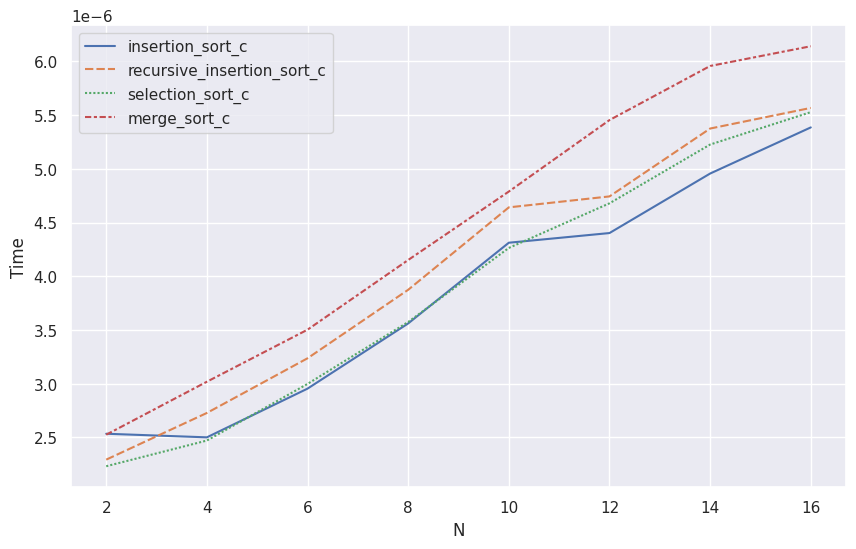

In [20]:
functions = {'insertion_sort_c': insertion_sort_c, 'recursive_insertion_sort_c': recursive_insertion_sort_c, 'selection_sort_c': selection_sort_c, 'merge_sort_c': merge_sort_c}
sizes = list(range(2, 17, 2))
df = visualization(sizes=sizes, functions=functions, samples=10000)

In [13]:
df

,merge_sort_py,merge_sort_ins_2_py,merge_sort_ins_4_py,merge_sort_ins_8_py
N,,,,
500,0.000790,0.000706,0.000767,0.000664
1000,0.001515,0.001357,0.001445,0.001437
1500,0.002373,0.002237,0.002155,0.002139
2000,0.003154,0.003019,0.003079,0.003045
2500,0.004075,0.003866,0.003812,0.003818
3000,0.005004,0.004877,0.004752,0.004829
3500,0.006221,0.005739,0.005705,0.005731
4000,0.006865,0.006701,0.006652,0.006625
4500,0.007882,0.007510,0.007493,0.007576


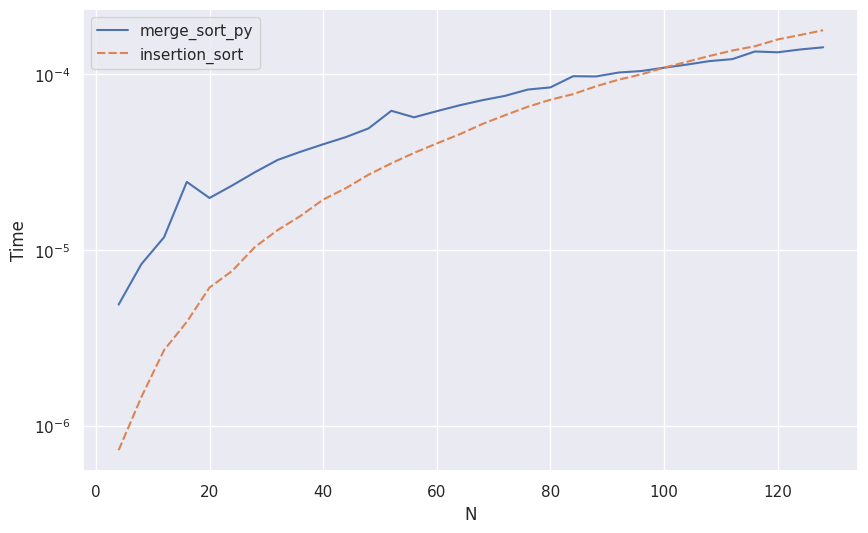

In [14]:
sizes = list(range(4, 129, 4))
df = visualization(sizes=sizes, functions=functions, samples=5000)

In [77]:
df.insertion_sort_c / df.merge_sort_c

N
4      0.969597
8      0.892623
12     0.876594
16     0.842341
20     0.941138
24     0.861205
28     0.842298
32     0.924010
36     0.871708
40     0.868751
44     0.870997
48     0.874582
52     0.868983
56     0.880119
60     0.891725
64     0.899480
68     0.895663
72     0.865585
76     0.903408
80     0.891396
84     0.951461
88     0.895249
92     0.924880
96     0.890882
100    0.910424
104    0.916714
108    0.925539
112    0.910516
116    0.921535
120    0.928448
124    0.916999
128    0.944714
dtype: float64

<Axes: xlabel='N'>

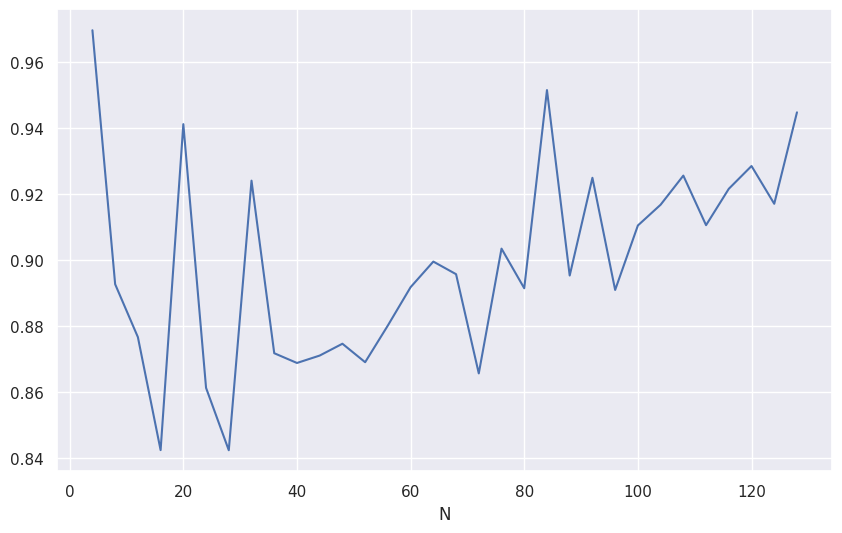

In [78]:
(df.insertion_sort_c / df.merge_sort_c).plot()

In [14]:
sizes = list(range(500, 20001, 500))
f_times = measure_times(functions=functions, sizes=sizes, samples=3)

In [16]:
df = pd.DataFrame(f_times, sizes).rename_axis(index='N')

[]

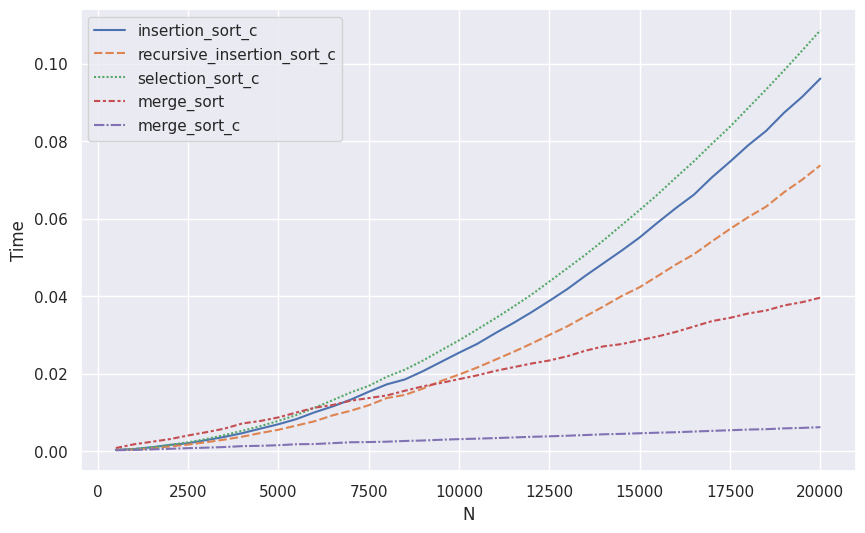

In [19]:
## 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.lineplot(data=df)
ax.set(ylabel='Time')
# plt.yscale('log')
plt.plot()

[]

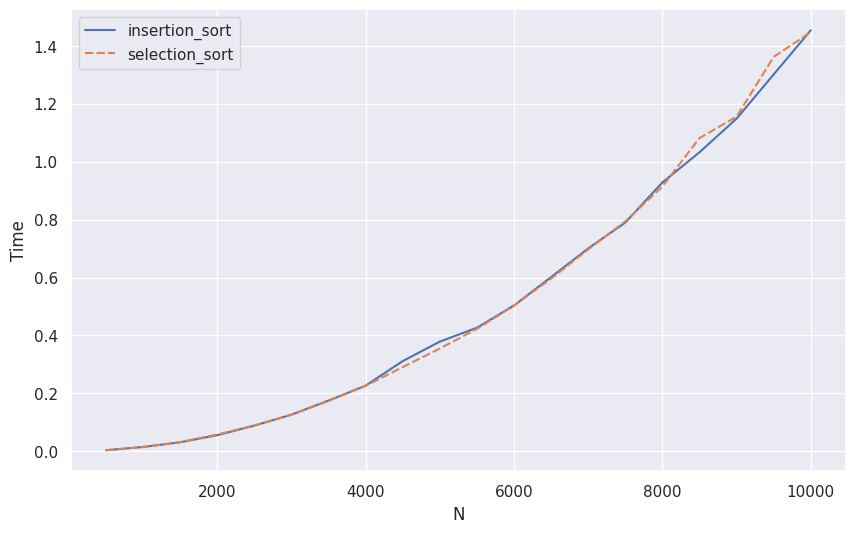

In [14]:
## 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.lineplot(data=df.iloc[:, [0,3]])
ax.set(ylabel='Time')
plt.plot()

[]

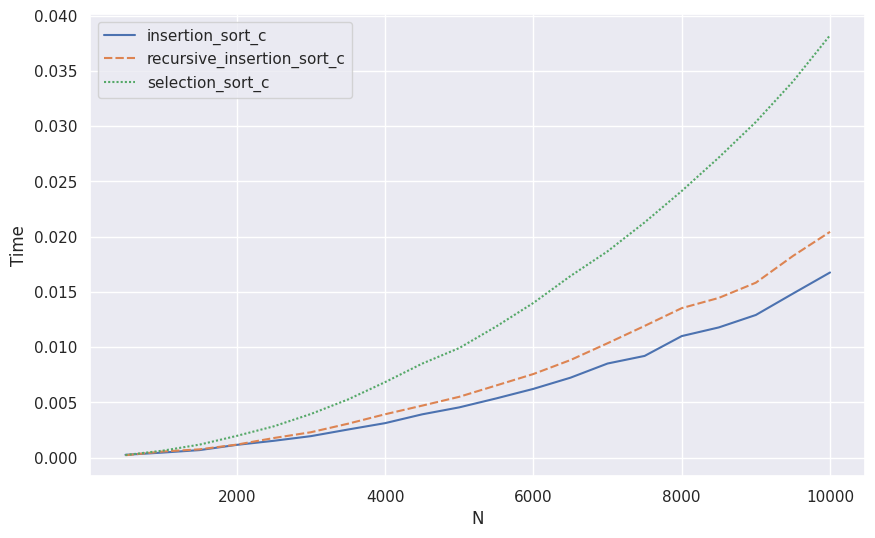

In [15]:
## 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (10, 6)})
ax = sns.lineplot(data=df.iloc[:, [1,2,4]])
ax.set(ylabel='Time')
plt.plot()

In [17]:
arr = []
for i in range(30000, -1, -1):
    arr.append(i)

In [18]:
%%timeit
insertion_sort_c(arr)

252 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit
selection_sort_c(arr)

269 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
